In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [5]:
df = pd.read_csv(' https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/ames2.csv', na_values=['NA', '?'])
df.dropna(inplace=True)
df.head()

,LotArea,GrLivArea,OverallQual,FullBath,TotalPorchSF,BsmtFinSF1,GaragedCat,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YrSold,BsmtUnfSF,GarageArea,MoSold,PavedDrive01,MSSubClass,logSalePrice
0,9120,1820,7,2,100,329,1,8,1026,1925,2008,697,240,6,0,50,12.122691
1,4060,1337,6,2,68,266,0,5,1405,1998,2008,1139,511,8,1,120,12.106252
2,34650,1056,5,1,0,1056,0,5,1056,1955,2006,0,572,1,1,190,11.884489
3,21750,1771,5,1,0,0,0,9,0,1960,2009,0,336,11,1,20,11.652687
4,11500,845,4,1,0,0,1,5,0,1957,2009,0,290,1,0,20,11.338572


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1000 non-null   int64  
 1   GrLivArea     1000 non-null   int64  
 2   OverallQual   1000 non-null   int64  
 3   FullBath      1000 non-null   int64  
 4   TotalPorchSF  1000 non-null   int64  
 5   BsmtFinSF1    1000 non-null   int64  
 6   GaragedCat    1000 non-null   int64  
 7   TotRmsAbvGrd  1000 non-null   int64  
 8   TotalBsmtSF   1000 non-null   int64  
 9   YearBuilt     1000 non-null   int64  
 10  YrSold        1000 non-null   int64  
 11  BsmtUnfSF     1000 non-null   int64  
 12  GarageArea    1000 non-null   int64  
 13  MoSold        1000 non-null   int64  
 14  PavedDrive01  1000 non-null   int64  
 15  MSSubClass    1000 non-null   int64  
 16  logSalePrice  1000 non-null   float64
dtypes: float64(1), int64(16)
memory usage: 132.9 KB


In [7]:
# Display the correlation matrix for the dataframe
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

               LotArea  GrLivArea  OverallQual  FullBath  TotalPorchSF  \
LotArea       1.000000   0.271826     0.124242  0.155140      0.089529   
GrLivArea     0.271826   1.000000     0.610830  0.639111      0.255120   
OverallQual   0.124242   0.610830     1.000000  0.579177      0.174789   
FullBath      0.155140   0.639111     0.579177  1.000000      0.083149   
TotalPorchSF  0.089529   0.255120     0.174789  0.083149      1.000000   
BsmtFinSF1    0.174474   0.136687     0.215519  0.080169      0.019961   
GaragedCat   -0.130252  -0.103092    -0.246449 -0.213392     -0.006152   
TotRmsAbvGrd  0.190936   0.842012     0.461186  0.542785      0.173314   
TotalBsmtSF   0.235157   0.403473     0.539971  0.340306      0.130104   
YearBuilt     0.036196   0.220854     0.557037  0.505925     -0.135091   
YrSold       -0.023266   0.016548    -0.005187  0.046511     -0.037365   
BsmtUnfSF     0.030978   0.242545     0.311923  0.266291      0.073482   
GarageArea    0.202571   0.462122     

In [ ]:
# Define the forward selection function
def forward_selection(data, target):
    initial_features = data.columns.tolist()
    best_features = []
    current_adj_r2 = 0

    # Iterate to find best features
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')

        for new_column in remaining_features:
            model_temp = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model_temp.rsquared_adj

        best_pval = new_pval.max()

        # If adding the new feature improves Adj R2, keep it
        if best_pval > current_adj_r2:
            best_feature = new_pval.idxmax()
            best_features.append(best_feature)
            current_adj_r2 = best_pval
        else:
            break

    return best_features

# Run forward selection using X and y
best_features = forward_selection(X, y)
print("Best Features:", best_features)
print("Number of features selected:", len(best_features))

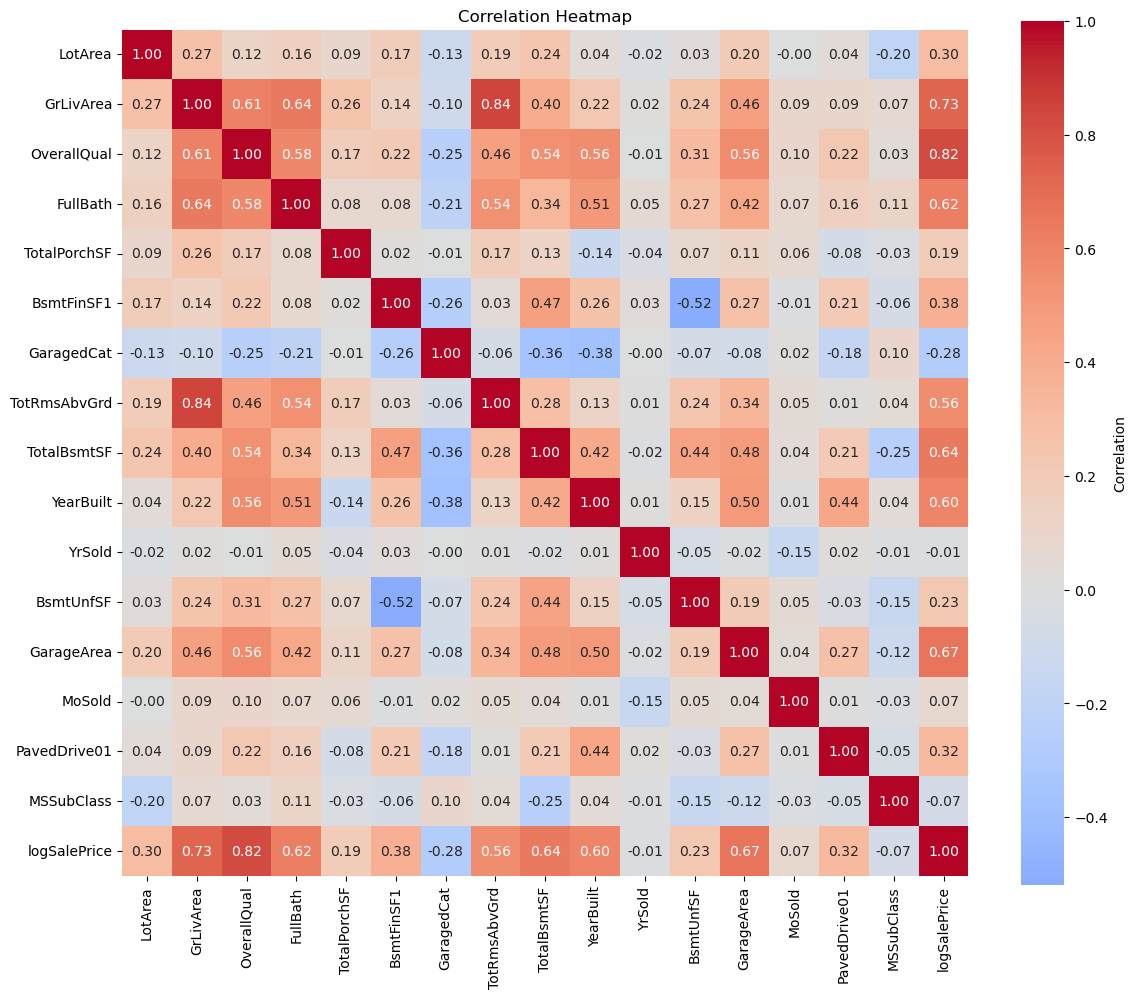

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [25]:
# Prepare features and target
X = df[features]
y = df['logSalePrice']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate performance metrics
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"  Intercept: {model.intercept_:.6f}")

NameError: name 'features' is not defined

In [ ]:
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           logSalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     733.2
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:12:03   Log-Likelihood:                 453.99
No. Observations:                1000   AIC:                            -890.0
Df Residuals:                     991   BIC:                            -845.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7354      0.441     13.018   

In [40]:
X2 = df[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1']]
y = df['logSalePrice']
model2 = LinearRegression()
model2.fit(X2, y)
model = sm.OLS(y, sm.add_constant(X2)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           logSalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     978.0
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:36:14   Log-Likelihood:                 453.27
No. Observations:                1000   AIC:                            -892.5
Df Residuals:                     993   BIC:                            -858.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.8415      0.401     14.584      

In [41]:
r = X2.corr()
print(r)

             OverallQual  GrLivArea  GarageArea  TotalBsmtSF  YearBuilt  \
OverallQual     1.000000   0.610830    0.562165     0.539971   0.557037   
GrLivArea       0.610830   1.000000    0.462122     0.403473   0.220854   
GarageArea      0.562165   0.462122    1.000000     0.484371   0.495051   
TotalBsmtSF     0.539971   0.403473    0.484371     1.000000   0.417254   
YearBuilt       0.557037   0.220854    0.495051     0.417254   1.000000   
BsmtFinSF1      0.215519   0.136687    0.267575     0.465180   0.261889   

             BsmtFinSF1  
OverallQual    0.215519  
GrLivArea      0.136687  
GarageArea     0.267575  
TotalBsmtSF    0.465180  
YearBuilt      0.261889  
BsmtFinSF1     1.000000  


In [42]:
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif_data[1:len(X2.columns)])

       feature        VIF
1    GrLivArea  16.527467
2   GarageArea   9.265910
3  TotalBsmtSF  13.333975
4    YearBuilt  22.243464
5   BsmtFinSF1   2.609355


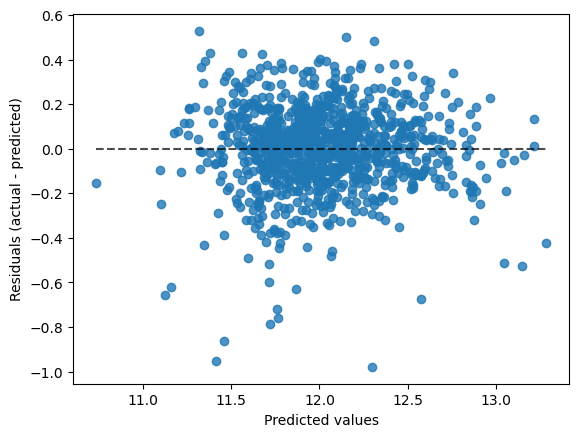

In [43]:
display = PredictionErrorDisplay.from_predictions(y, y_hat)
plt.show()

In [74]:
df = pd.read_csv('https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/ames2.csv')

df['log_SalePrice'] = np.log(df['logSalePrice'])
df = df.drop(columns=['logSalePrice']) # Drop original target

# Handle Categorical Variables (One-Hot Encoding)
# drop_first=True prevents multicollinearity (dummy variable trap)
df_encoded = pd.get_dummies(df, drop_first=True)

# Handle Missing Values (Simple imputation for stability)
df_encoded = df_encoded.fillna(df_encoded.mean())



def forward_selection(data, target):
    initial_features = data.columns.tolist()
    best_features = []

    # Iterate to find best features
    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.rsquared_adj

        best_pval = new_pval.max()

        # If adding the new feature improves Adj R2, keep it
        if(len(best_features) == 0 or best_pval > current_adj_r2):
            best_features.append(new_pval.idxmax())
            current_adj_r2 = best_pval
        else:
            break

    return best_features
print(best_features)


# Separate predictors (X) and target (y)
X = df_encoded.drop(columns=['log_SalePrice', 'FullBath', 'TotRmsAbvGrd', 'GaragedCat', 'YrSold','BsmtFinSF1', 'MoSold', 'TotalPorchSF' ])
y = df_encoded['log_SalePrice']

# Run Selection (This might take a moment)
# Note: For a simpler approach with just 17 cols, we can often just fit all
# and remove insignificant ones, but this ensures max Adj R2., 
# If the loop is too complex, you can simply fit all variables:
# final_features = X.columns.tolist()

# Fitting the Final Model
X_final = sm.add_constant(X)
model = sm.OLS(y, X_final).fit()




# 4. Output for Appendix and Report
print("FINAL ADJUSTED R-SQUARED:", model.rsquared_adj)
print(model.summary())

NameError: name 'best_features' is not defined

In [72]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data[1:len(X.columns)])

        feature        VIF
1     GrLivArea  17.974566
2   OverallQual  45.972793
3   TotalBsmtSF  14.018358
4     YearBuilt  32.443988
5     BsmtUnfSF   3.483546
6    GarageArea   9.657051
7  PavedDrive01  13.222977
8    MSSubClass   3.372940


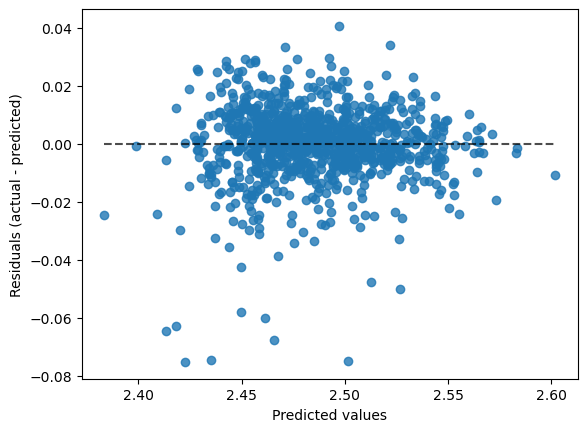

In [73]:
y_hat = model.predict(X_final)
display = PredictionErrorDisplay.from_predictions(y, y_hat)
plt.show()